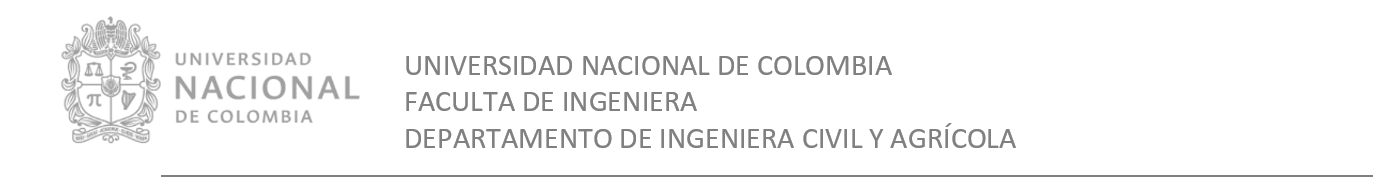

# **AN√ÅLISIS EXPLORATORIO Y T√âCNICAS B√ÅSICAS EN SEGURIDAD VIAL  - FUNCIONES DE DESEMPE√ëO DE SEGRUDAD VIAL STF**
----------
*CATEDRA INTERNACIONAL DE INGENIER√çA.*

*CIUDADES INTELIGENTES Y ANAL√çTICA DE DATOS*

*Facultad de Ingenier√≠a*

*Departamento de Ingeniero Civil y Agr√≠cola*

-------



## **0. ENTENDIMIENTO DEL NEGOCIO.**
-----------

La siniestralidad del transporte de carga es una de las principales preocupaciones en Europa, Estados Unidos y Colombia debido a que representa m√°s del 15% de la siniestralidad de los pa√≠ses, el incremento de la siniestralidad con respecto al a√±o anterior ha superado el 8% y en m√°s del 80% de las fatalidades corresponde a otros actores viales diferentes a los ocupantes del veh√≠culo de carga, donde principalmente fallecen peatones, ciclistas y motociclistas. La siniestralidad en las v√≠as nacionales que cruzan por zonas urbanas ha sido poco estudiada y es una de las principales problem√°ticas de pa√≠ses de ingresos medios y bajos, por lo tanto, se requiere analizar dos grandes variables en la siniestralidad: el transporte de carga y el paso por zonas urbanas.

Los modelos espaciales de seguridad vial contemplan datos de siniestros viales, datos de tr√°fico y variables de dise√±o de la infraestructura vial. Generalmente se desarrollan como una ecuaci√≥n de regresi√≥n simple (Safety Performance Function - SPF) donde la correlaci√≥n espacial contempla m√∫ltiples variables en un mismo lugar. Los modelos existentes constituyen un punto de partida para desarrollar un modelo m√°s confiable el cual puede ser calibrado con la modificaci√≥n de los factores que influyen en los siniestros viales (Crash Modification Factors - CMF); posteriormente a la implementaci√≥n del modelo, los tomadores de decisiones definen contramedidas por medio de los CMF que buscan intervenir las barreras que inciden en la siniestralidad vial, con el fin de mejorar los niveles de seguridad y reducir la cantidad y/o la severidad de los siniestros viales (Yannis, et al., 2016).

*El presente proyecto corresponde a un ejercicio pr√°ctico en el marco de la catedra de internacional de la faculta de ingenier√≠a donde se explora la ciencia de datos en el marco de la seguridad vial, en este ejemplo, se explora la creaci√≥n de FTS empleando modelos param√©tricos GLM ‚Äì Modelos Lineales Generalizados.*

### **0.1 Problema de Investigaci√≥n**

---------

Al analizar la pandemia de la siniestralidad vial, en particular en el contexto de las ciudades del sur global, se evidencia la necesidad de aplicar los modelos y metodolog√≠as ya presentadas para el estudio de la problem√°tica de predicci√≥n de las tasas y frecuencia de siniestros viales en el contexto de la red vial arterial en la ciudad de Bogot√°, modelando la causalidad y/o aporte de las diferentes variables explicativas o de riesgo en las tasas de accidentalidad y teniendo en cuenta la correlaci√≥n espacial existente en el an√°lisis de la siniestralidad, problema al cual se pretende dar respuesta en el desarrollo de la presente investigaci√≥n.

### **0.2 Hip√≥tesis**
------------

Se espera que la metodolog√≠a y los modelos realizado para la predicci√≥n del n√∫mero de siniestros, permita identificar los factores y las variables que caracterizan las tasas de siniestros con alta precisi√≥n estad√≠stica (variables como: vol√∫menes vehiculares, composici√≥n de veh√≠culos pesados, caracter√≠sticas de la infraestructura, variaci√≥n promedio de las velocidades, entre otras), y la aplicaci√≥n de los modelos de probabilidad, permita predecir de manera satisfactoria las tasas de eventos ocurridos y la frecuencia de siniestros en la red arterial de la ciudad de Bogot√°.


### **0.3 Pregunta de Investigaci√≥n**

--------

¬øCu√°les son los factores de riesgo y las variables que explican de manera m√°s significativa la siniestralidad en los tres diferentes escenarios de la ciudad de Bogot√°? Y ¬øEs posible construir una funci√≥n de desempe√±o de seguridad vial SPF y cu√°l ser√° su poder de predicci√≥n al ser con un conjunto de pruebas?

### **0.4 Objetivo General**

-------
‚Ä¢	Estimar funciones de desempe√±o de seguridad vial a partir de modelos multivariados de los siniestros y calibrados para el escenario estudiado, que permitan estimar de manera adecuada la ocurrencia de siniestros viales, aplicando t√©cnicas de regresi√≥n multivariadas y validaci√≥n cruzada en la evaluaci√≥n del desempe√±o de los modelos.

#### **0.4.1 Objetivos especificos**

-------


*   Aplicar la metodolog√≠a CRISP-DM para el an√°lisis de datos en un escenario practico.
*   Repasar algunos de los conceptos te√≥ricos vistos en la sesi√≥n anterior.
*   Entender el conjunto de datos aplicando t√©cnicas de estad√≠stica descriptiva y entendimiento del negocio.
*   Entender la importancia de la identificaci√≥n de variables claves y el proprocesamiento de estas.
*   Entrenar y evaluar una FPS en el contexto de la siniestralidad en Bogot√°.




In [1]:
print('Hola Mundo')

Hola Mundo


### **0.5 Libreria de Datos**
------------------------


| Variable | Descripci√≥n                                                                         | Tipo de variable |
| -------- | ----------------------------------------------------------------------------------- | ---------------- |
| SIN      | N√∫mero de siniestros por kilometro                                                  | int64            |
| ADTPH    | Volumen vehicular promedio diario en hora pico                                      | int64            |
| P_MOTO   | Porcentaje de veh√≠culos tipo autom√≥viles con respecto al TPHD.                      | float64          |
| P_CAR    | Porcentaje de veh√≠culos tipo motocicleta con respecto al TPHD.                      | float64          |
| P_BUS    | Porcentaje de veh√≠culos tipo bus con respecto al TPHD.                              | float64          |
| P_TRUCK  | Porcentaje de veh√≠culos tipo cami√≥n con respecto al TPHD.                           | float64          |
| VEL      | Promedio de la velocidad media diaria en el segmento.                               | float64          |
| VELSD    | Desviaci√≥n est√°ndar de la velocidad media diaria en el segmento.                    | float64          |
| CURV     | Curvatura promedio del segmento medido en grados                                    | float64          |
| CURVSD   | Desviaci√≥n est√°ndar de la curvatura promedio del segmento                           | float64          |
| GRAD     | Gradiente vertical promedio del segmento medido en porcentaje                       | float64          |
| GRADSD   | Desviaci√≥n est√°ndar del gradiente promedio del segmento                             | float64          |
| CARR     | Numero promedio de carriles por secci√≥n del segmento                                | int64            |
| RIGID    | Presencia de pav Rigido = 1                                                         | Bool             |
| FLEX     | Presencia de pav Flexible = 1                                                       | Bool             |
| MIX      | Presencia de pav Mixt = 1                                                           | Bool             |
| INT      | Numero de intersecciones no semaforizadas por kilometro                             | float64          |
| SIGINT   | Numero de intersecciones semaforizadas por kilometro                                | float64          |
| SIDWAL   | Ancho promedio de anden peatonal por segmento.                                      | float64          |
| PVEH     | Existencia de puentes vehiculares en el segmento (1=si, 0=no)                       | Bool             |
| PPEAT    | Existencia de puentes peatonales en el segmento (1=si, 0=no)                        | Bool             |
| CICLO    | Presencia de Cicloruta en el segmento (1=si, 0=no)                                  | Bool             |
| LUM      | Numero de postes de luz en los segmentos por kilometro                              | float64          |
| RSITP    | N√∫mero de rutas de transporte p√∫blico colectivo en el segmento                      | int64            |
| PSITP    | Existencia de paraderos de Transporte p√∫blico colectivo en el segmento (1=si, 0=no) | float64          |
| RTRON    | N√∫mero de rutas de Transporte p√∫blico masivo en el segmento                         | int64            |
| ESTM     | Existencia de estaciones de transporte p√∫blico masivo en el segmento (1=si, 0=no)   | Bool             |
| RALIM    | N√∫mero de rutas del sistema alimentados al transporte p√∫blico masivo.               | int64            |
| COMUS    | √Årea de uso de suelo comercial adyacente al segmento por kil√≥metro                  | float64          |
| RESIUS   | √Årea de uso de suelo residencial adyacente al segmento por kil√≥metro                | float64          |

## **0.6 Visualizacion de la Siniestralidad**
.................

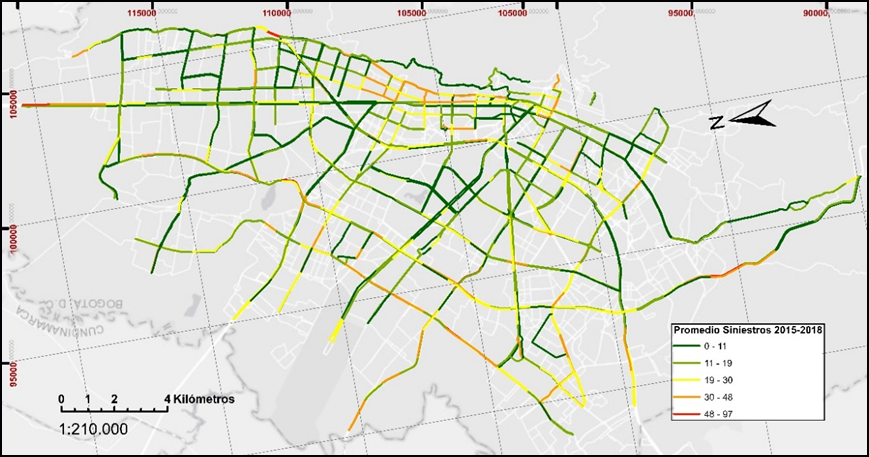


## **1. DEPENDENCIAS**
---

Importamos las librer√≠as necesarias y definimos algunas funciones b√°sicas de visualizaci√≥n que vamos a usar en algunos ejemplos.

-----------

In [ ]:
# Se realiza la instalaci√≥n de las librerias necesarias por actualizar o instalar
!pip install geodatasets

# Actualizamos scikit-learn a la √∫ltima versi√≥n
!pip install -U scikit-learn

# Actualizamos statsmodels a la √∫ltima versi√≥n
!pip install statsmodels tqdm

In [ ]:
# --- Manipulaci√≥n de datos ---
import pandas as pd
import numpy as np
import os
import re
import math

# --- Visualizaci√≥n ---
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.legend_handler import HandlerTuple
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.animation as animation
import plotly.express as px
import plotly.graph_objects as go
import matplotlib as mpl

# --- Google Colab (solo si se usa en Colab) ---
from google.colab import drive  # Montar Google Drive

# --- Preprocesamiento y modelos (scikit-learn) ---
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split, KFold
from sklearn.cluster import KMeans

# --- Modelado estad√≠stico (statsmodels) ---
import statsmodels.api as sm
import statsmodels.formula.api as smf

# --- Utilidades ---
from tqdm import tqdm

In [ ]:
# Configuraciones para las librer√≠as y m√≥dulos usados.

# Ignoramos las advertencias o warnings.
import warnings
warnings.simplefilter(action='ignore')

# Configuramos el formato por defecto de la
# librer√≠a de visualizaci√≥n Matplotlib.
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
mpl.rcParams['figure.dpi'] = 105
mpl.rcParams['figure.figsize'] = (9, 7)
sns.set_theme()

### **1.2. Funciones de utilidad y visualizaci√≥n**
---

Para ilustrar los ejemplos discutidos en este material utilizaremos algunas funciones que permiten visualizar de manera general los datos, junto a las funciones de predicci√≥n obtenidas con cada modelo.


In [ ]:
def IQR(column):
    q25, q75 = column.quantile([0.25, 0.75])
    return q75-q25

In [ ]:
def range_f(column):
    return column.max() - column.min()

In [ ]:
stats_list = [
    range_f, # custom function
    'median',
    'sum','skew','kurt',
    'var', # numpy function
    IQR   # custom function
]

In [ ]:
def remove_multiple_elements(my_list, values_to_remove):
    """
    Removes all occurrences of multiple values from a list.

    Args:
        my_list: The original list.
        values_to_remove: A list of values to remove from my_list.

    Returns:
        A new list with the specified values removed.
    """
    return [item for item in my_list if item not in values_to_remove]

In [ ]:
def fit_model(X_sub, y_sub):
    X_sub = sm.add_constant(X_sub, has_constant='add')
    model = sm.GLM(y_sub, X_sub, family=sm.families.NegativeBinomial())
    result = model.fit()
    return result

In [ ]:
def stepwise_selection(X, y, threshold_in=0.01, threshold_out=0.05, verbose=False):
    included = []
    while True:
        changed = False
        # forward step
        excluded = list(set(X.columns) - set(included))
        new_pvals = pd.Series(index=excluded, dtype=float)
        for new_col in excluded:
            try:
                model = fit_model(X[included + [new_col]], y)
                new_pvals[new_col] = model.pvalues.get(new_col, np.nan)
            except:
                continue
        best_pval = new_pvals.min()
        if best_pval is not np.nan and best_pval < threshold_in:
            best_feature = new_pvals.idxmin()
            included.append(best_feature)
            changed = True
            if verbose:
                print(f' + {best_feature}')
        # backward step
        model = fit_model(X[included], y)
        pvals = model.pvalues.iloc[1:]  # sin constante
        worst_pval = pvals.max()
        if worst_pval > threshold_out:
            worst_feature = pvals.idxmax()
            included.remove(worst_feature)
            changed = True
            if verbose:
                print(f' - {worst_feature}')
        if not changed:
            break
    return included


In [ ]:
# Gr√°fica de la varianza explicada acumulada.

def cumulative_explained_variance_plot(expl_variance):

  cum_var_exp = np.cumsum(expl_variance)

  plt.figure(dpi = 100, figsize = (8, 6))
  plt.title('Curva acumulativa de la varianza explicada VS n¬∞ de componentes principales',
            fontdict= dict(family ='serif', size = 16))
  plt.xlabel('N√∫mero de componentes principales',
             fontdict= dict(family ='serif', size = 14))
  plt.ylabel('Varianza explicada acumulativa',
             fontdict= dict(family ='serif', size = 14))

  nc = np.arange(1, expl_variance.shape[0] + 1)

  plt.plot(nc, cum_var_exp, '--r')
  plt.plot(nc, cum_var_exp, 'c*', ms = 5)
  plt.show()

### **1.3. Cargue de la base de datos**
---

Se carga la base de datos que se va a utilizar para el an√°lisis


In [ ]:
df=pd.read_excel('/content/Practica_1_Siniestros.xlsx',sheet_name='Sheet1')

In [ ]:
df.head()

LLAVE      TID            TRAMO        CORREDOR  TYPE   LON_TRAMO  SIN  \
0      0  1000335  AV.CARACAS;KR10         CL11SUR    12  628.945969    0   
1      1  1000089      CL134;CL140             KR7    59  502.109523    7   
2      2  1000221        KR15;KR19           CL147    16  463.498457    4   
3      3  1000309        CL24;CL19  AV.CIRCUNVALAR     4  523.757896    9   
4      4  1000665  AV.P.MAYO;CL27S            KR10    45  545.660606    7   

   TPDH    P_MOTO    P_AUTO  ...       UCOM      URESI        LUM   A√ëO  \
0   262  0.217973  0.453155  ...   0.000000  40.206916  54.753452  2014   
1   722  0.084488  0.502770  ...   0.000000  13.711740  19.729151  2014   
2   100  0.045226  0.396985  ...   0.350840  56.965401  54.686822  2014   
3   492  0.130081  0.815041  ...  21.209919  60.991939  66.434283  2014   
4   464  0.209277  0.248652  ...   4.364013  21.365427  15.896330  2014   

   TRONCAL  SEC_TRON  CARRIL_PRE  NOM_CARRIL  ALIMENT  SEC_ALIMEN  
0        0       NaN           0         NaN        0         NaN  
1        0       NaN           0         NaN        0         NaN  
2        0       NaN           0         NaN        0         NaN  
3        0       NaN           0         NaN        0         NaN  
4        0       NaN           0         NaN        0         NaN  

[5 rows x 44 columns]

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5226 entries, 0 to 5225
Data columns (total 44 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   LLAVE       5226 non-null   int64  
 1   TID         5226 non-null   int64  
 2   TRAMO       5226 non-null   object 
 3   CORREDOR    5226 non-null   object 
 4   TYPE        5226 non-null   int64  
 5   LON_TRAMO   5226 non-null   float64
 6   SIN         5226 non-null   int64  
 7   TPDH        5226 non-null   int64  
 8   P_MOTO      5226 non-null   float64
 9   P_AUTO      5226 non-null   float64
 10  P_BUS       5226 non-null   float64
 11  P_CAMION    5226 non-null   float64
 12  VEL         5226 non-null   float64
 13  VELSD       5226 non-null   float64
 14  LON         5226 non-null   float64
 15  CURV        5226 non-null   float64
 16  CURVSD      4080 non-null   float64
 17  PEND        5226 non-null   float64
 18  PENDSD      5226 non-null   float64
 19  CARR        5226 non-null  

## **2. AN√ÅLISIS EXPLORATORIO DE DATOS (EDA).**
---
El objetivo principal de la estad√≠stica descriptiva es **resumir, organizar y presentar los datos de manera clara y comprensible**, para que sea m√°s f√°cil entender lo que dicen esos datos sin hacer inferencias m√°s all√° del conjunto analizado, con la finalidad de aplicar los conocimientos, se presenta el siguiente taller pr√°ctico.

En este apartado realizaremos el an√°lisis y la exploraci√≥n de los datos, para lo cual lo abordaremos de la siguiente manera:


*   Caracter√≠sticas del conjunto de datos.
*   Tipos y Ajustes de Variables.
*   Estadistica Descriptiva

De igual manera, debemos tener cuenta algunos algunas de las consideraciones de las que se hablo reviamente.

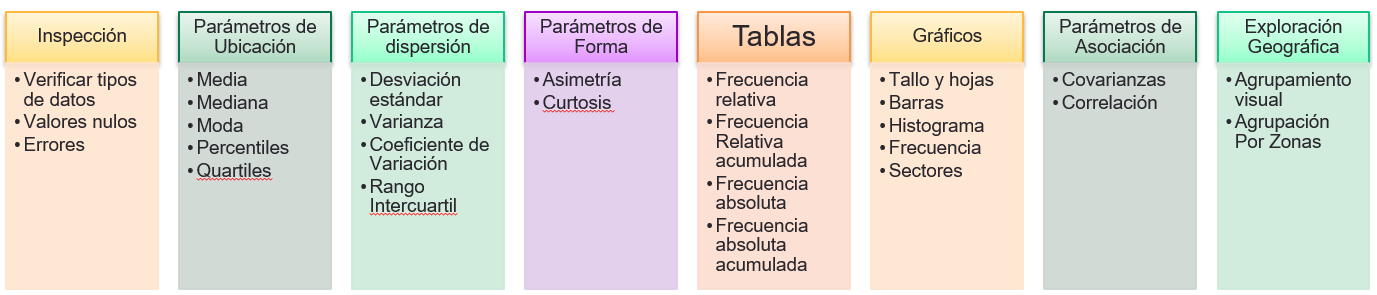

### **2.1 Caracter√≠sticas del conjunto de datos.**
---

Lo primero a entender son las caracter√≠sticas del set de datos a revisar, se manera que se pueda tener un mejor entendimiento del ejercicio.

In [ ]:
print(f"El dataframe contienen {df.shape[0]} registros y un total de {df.shape[1]} columnas")

El dataframe contienen 5226 registros y un total de 44 columnas


In [ ]:
file_path = r"/content/Practica_1_Siniestros.xlsx"
file_size = os.path.getsize(file_path) /1024**2

print(f"El tama√±o del archivo {file_path} es {file_size:.4f}' MB")

El tama√±o del archivo /content/Practica_1_Siniestros.xlsx es 1.8630' MB


In [ ]:
columnas = list(df.columns)
print(f"El Data ser contienen las siguientes {df.shape[1]} Columnas: \n{columnas}")

El Data ser contienen las siguientes 44 Columnas: 
['LLAVE', 'TID', 'TRAMO', 'CORREDOR', 'TYPE', 'LON_TRAMO', 'SIN', 'TPDH', 'P_MOTO', 'P_AUTO', 'P_BUS', 'P_CAMION', 'VEL', 'VELSD', 'LON', 'CURV', 'CURVSD', 'PEND', 'PENDSD', 'CARR', 'RIGID', 'FLEX', 'MIX', 'PVEH', 'PPEAT', 'INT', 'INTSEM', 'AND', 'CICLO', 'PSITP', 'ESTM', 'RTRON', 'RALIM', 'RSITP', 'UCOM', 'URESI', 'LUM', 'A√ëO', 'TRONCAL', 'SEC_TRON', 'CARRIL_PRE', 'NOM_CARRIL', 'ALIMENT', 'SEC_ALIMEN']


In [ ]:
df=df.drop(['LLAVE','TID','TYPE','LON','LON_TRAMO','A√ëO', 'TRONCAL', 'SEC_TRON', 'CARRIL_PRE', 'NOM_CARRIL','ALIMENT','SEC_ALIMEN'], axis=1)

In [ ]:
# Catida de datos nulos por columna
print(df.isnull().sum())

TRAMO          0
CORREDOR       0
SIN            0
TPDH           0
P_MOTO         0
P_AUTO         0
P_BUS          0
P_CAMION       0
VEL            0
VELSD          0
CURV           0
CURVSD      1146
PEND           0
PENDSD         0
CARR           0
RIGID          0
FLEX           0
MIX            0
PVEH           0
PPEAT          0
INT          384
INTSEM       534
AND            6
CICLO          0
PSITP        588
ESTM           0
RTRON       3420
RALIM       4386
RSITP        192
UCOM          24
URESI         24
LUM           18
dtype: int64


### **2.2 Tipos y Ajustes de Variables.**
---

Como se vio en sesiones anteriores, luego de entender el conjunto de datos, es importante entender y definir el tipo de variables, as√≠ como sus caracter√≠sticas generales, de manera que sea posible hacer un tratamiento de datos mas adecuado.

In [ ]:
df = df.fillna(0)

In [ ]:
columnas_binarias = ['PVEH', 'PPEAT','CICLO','ESTM','RIGID','FLEX','MIX']  # columnas que contienen solo 0 y 1

df[columnas_binarias] = df[columnas_binarias].astype(bool)
columnas_binarias

['PVEH', 'PPEAT', 'CICLO', 'ESTM', 'RIGID', 'FLEX', 'MIX']

In [ ]:
numeric_cols = df.select_dtypes(include=np.number).columns
numeric_cols

Index(['SIN', 'TPDH', 'P_MOTO', 'P_AUTO', 'P_BUS', 'P_CAMION', 'VEL', 'VELSD',
       'CURV', 'CURVSD', 'PEND', 'PENDSD', 'CARR', 'INT', 'INTSEM', 'AND',
       'PSITP', 'RTRON', 'RALIM', 'RSITP', 'UCOM', 'URESI', 'LUM'],
      dtype='object')

In [ ]:
# Identify object columns
object_cols = df.select_dtypes(include='object').columns
object_cols

Index(['TRAMO', 'CORREDOR'], dtype='object')

### **2.3 Estadistica Descriptiva**

---
Realizar un AED es esencial. Permite visualizar la distribuci√≥n de datos, identificar valores at√≠picos y comprender las relaciones entre variables. Este paso puede guiarle en la elecci√≥n del algoritmo de agrupamiento y el n√∫mero de conglomerados adecuados.

In [ ]:
d = (df[numeric_cols].describe().round(2)).iloc[:,0:]
f =df[numeric_cols].reindex(d.columns, axis = 1).agg(func=stats_list).round(3)
frames = [d,f]
result = pd.concat(frames).applymap('{:.2f}'.format)

In [ ]:
result

SIN        TPDH   P_MOTO   P_AUTO    P_BUS P_CAMION        VEL  \
count     5226.00     5226.00  5226.00  5226.00  5226.00  5226.00    5226.00   
mean         4.39      609.56     0.16     0.53     0.26     0.05      30.44   
std          4.03      332.10     0.11     0.20     0.20     0.04       9.84   
min          0.00        9.00     0.00     0.00     0.00     0.00       3.96   
25%          1.00      370.00     0.08     0.39     0.11     0.02      23.38   
50%          3.00      555.00     0.14     0.54     0.22     0.03      29.12   
75%          6.00      776.00     0.22     0.67     0.37     0.07      36.44   
max         30.00     2195.00     0.67     0.97     0.99     0.28      66.21   
range_f     30.00     2186.00     0.66     0.97     0.99     0.28      62.25   
median       3.00      555.00     0.14     0.54     0.22     0.03      29.12   
sum      22944.00  3185586.00   848.03  2754.10  1377.78   246.08  159075.87   
skew         1.46        1.15     0.98    -0.28     1.09     1.64       0.61   
kurt         2.80        2.02     0.65    -0.41     0.98     3.05       0.31   
var         16.21   110293.55     0.01     0.04     0.04     0.00      96.85   
IQR          5.00      406.00     0.14     0.28     0.26     0.05      13.06   

            VELSD      CURV    CURVSD  ...       INT    INTSEM       AND  \
count     5226.00   5226.00   5226.00  ...   5226.00   5226.00   5226.00   
mean        10.38      5.13      4.01  ...      3.66      2.85      3.92   
std          3.77      6.02      6.01  ...      2.68      2.31      2.35   
min          1.08      0.00      0.00  ...      0.00      0.00      0.00   
25%          7.91      1.10      0.24  ...      1.87      1.16      2.37   
50%         10.24      3.31      2.34  ...      3.14      2.44      3.40   
75%         12.82      6.86      5.43  ...      4.86      3.85      4.73   
max         24.26     51.63     65.73  ...     21.82     11.79     20.17   
range_f     23.18     51.63     65.73  ...     21.82     11.79     20.16   
median      10.24      3.31      2.34  ...      3.14      2.44      3.40   
sum      54255.92  26825.01  20958.23  ...  19153.05  14873.46  20491.97   
skew         0.20      2.54      4.35  ...      1.53      1.22      2.29   
kurt        -0.01      9.65     28.92  ...      4.49      1.57      8.39   
var         14.23     36.24     36.09  ...      7.21      5.34      5.53   
IQR          4.91      5.76      5.19  ...      2.99      2.70      2.36   

            PSITP     RTRON    RALIM     RSITP      UCOM      URESI        LUM  
count     5226.00   5226.00  5226.00   5226.00   5226.00    5226.00    5226.00  
mean         2.62      5.68     0.53     17.07     11.92      24.28      44.16  
std          2.11     10.11     1.68     11.94     16.23      19.72      24.14  
min          0.00      0.00     0.00      0.00      0.00       0.00       0.00  
25%          0.97      0.00     0.00      8.00      2.59       8.77      29.42  
50%          2.25      0.00     0.00     15.00      6.75      20.08      38.64  
75%          3.66      8.00     0.00     25.00     15.19      36.67      53.45  
max         11.32     63.00    12.00     69.00    191.01     145.18     233.56  
range_f     11.32     63.00    12.00     69.00    191.01     145.18     233.56  
median       2.25      0.00     0.00     15.00      6.75      20.08      38.64  
sum      13716.59  29706.00  2784.00  89202.00  62274.10  126893.48  230796.83  
skew         1.03      1.84     4.23      0.98      3.82       1.18       2.42  
kurt         0.86      2.83    19.50      1.28     25.05       2.43      12.09  
var          4.47    102.25     2.82    142.66    263.32     388.85     582.83  
IQR          2.70      8.00     0.00     17.00     12.60      27.90      24.03  

[15 rows x 23 columns]

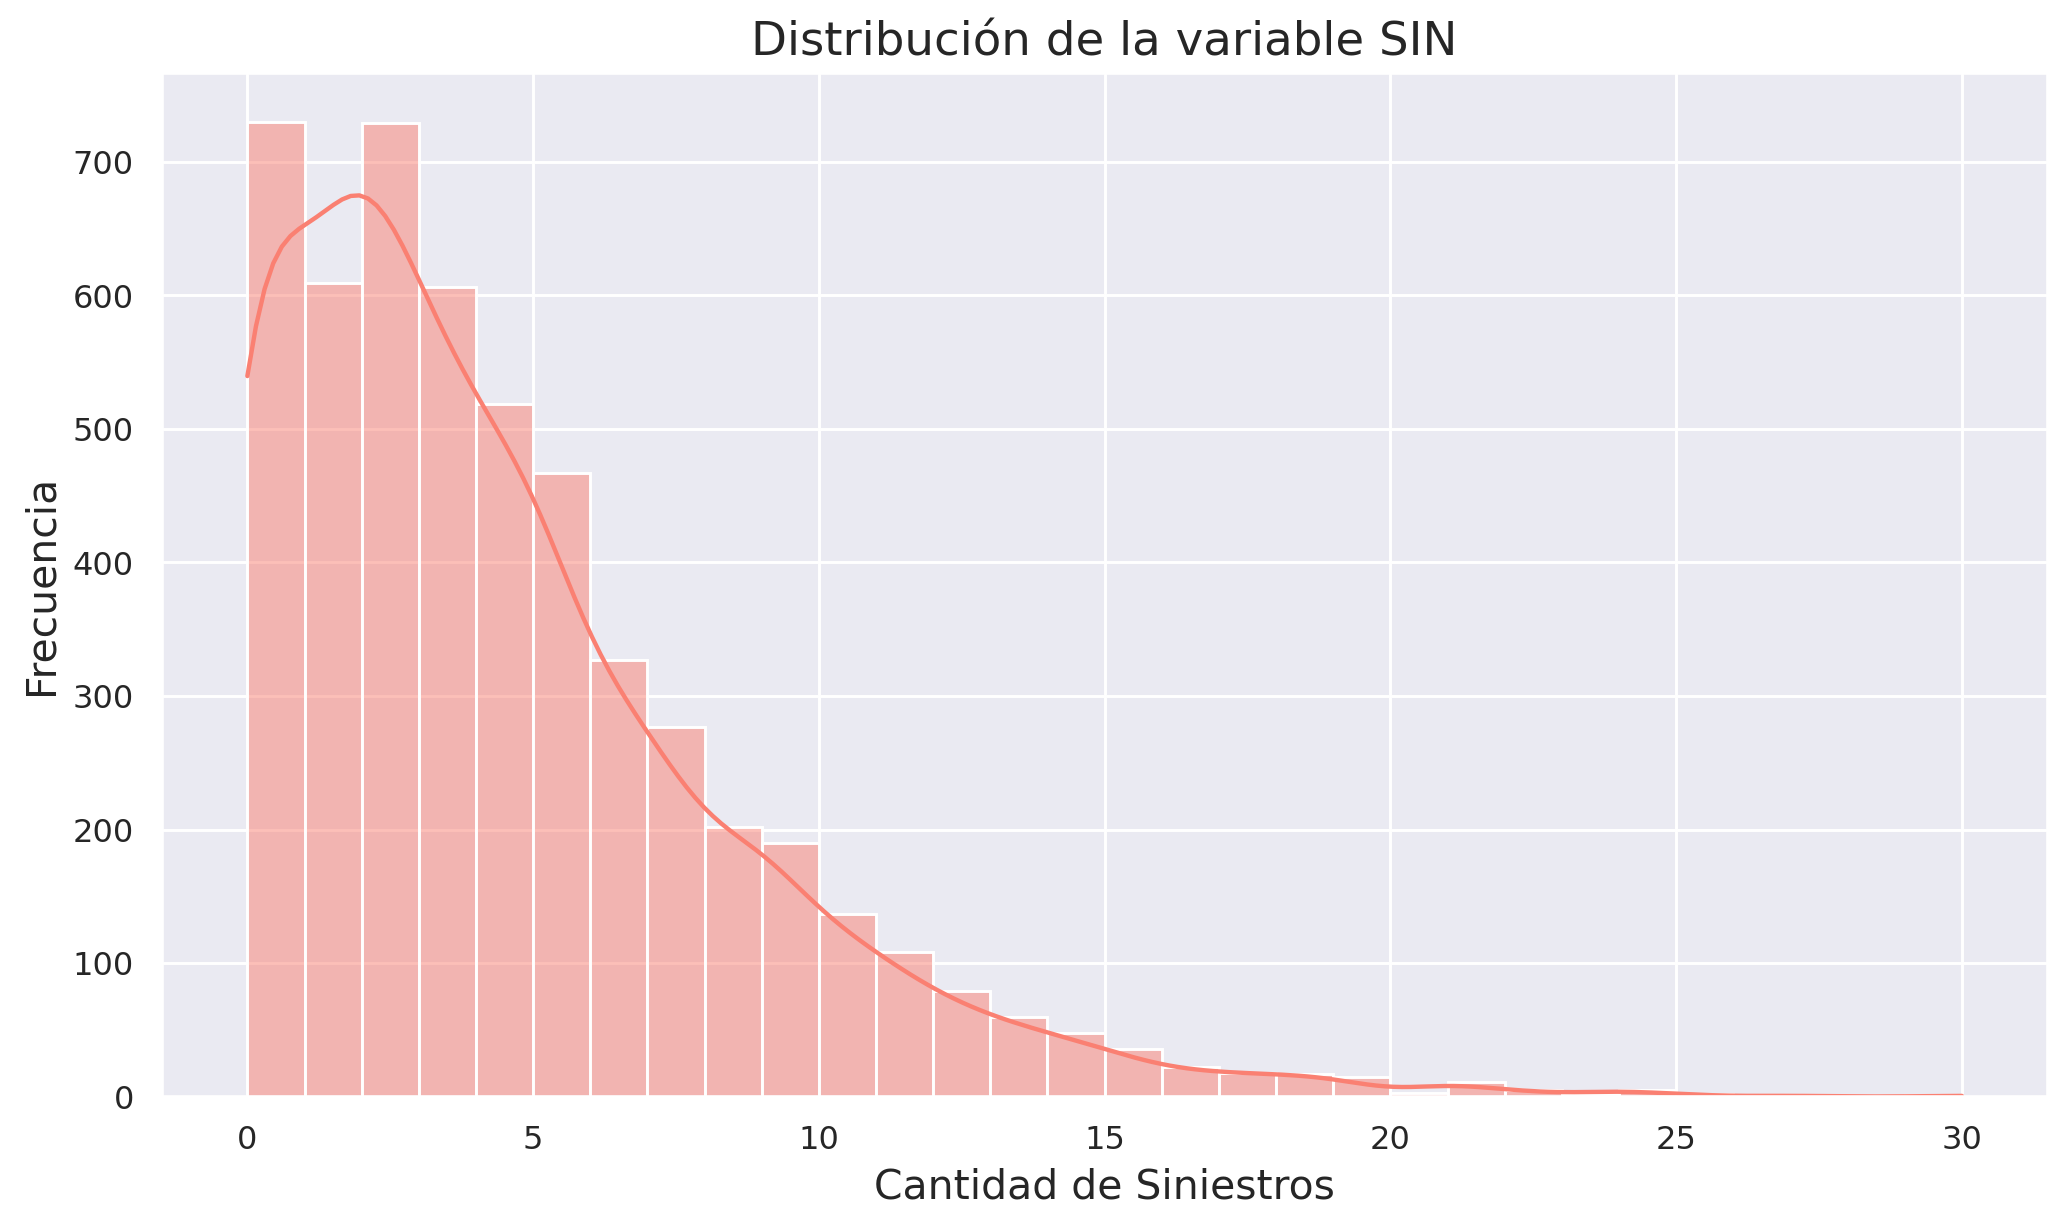

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x="SIN", bins=30, kde=True, color='salmon')

plt.title("Distribuci√≥n de la variable SIN", fontsize=16)
plt.xlabel("Cantidad de Siniestros", fontsize=14)
plt.ylabel("Frecuencia", fontsize=14)
plt.tight_layout()
plt.show()

In [ ]:
corr = df[numeric_cols].corr()
corr.style.background_gradient(cmap='coolwarm')

mask = np.zeros_like(corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True
corr[mask] = np.nan
(corr
 .style
 .background_gradient(cmap='coolwarm', axis=None, vmin=-1, vmax=1)
 .highlight_null(color='#f1f1f1')  # Color NaNs grey
 .format(precision=2))

In [ ]:
# --- Correlaci√≥n con la variable respuesta 'SIN' ---
correlaciones = df.corr(numeric_only=True)['SIN'].sort_values(ascending=False)


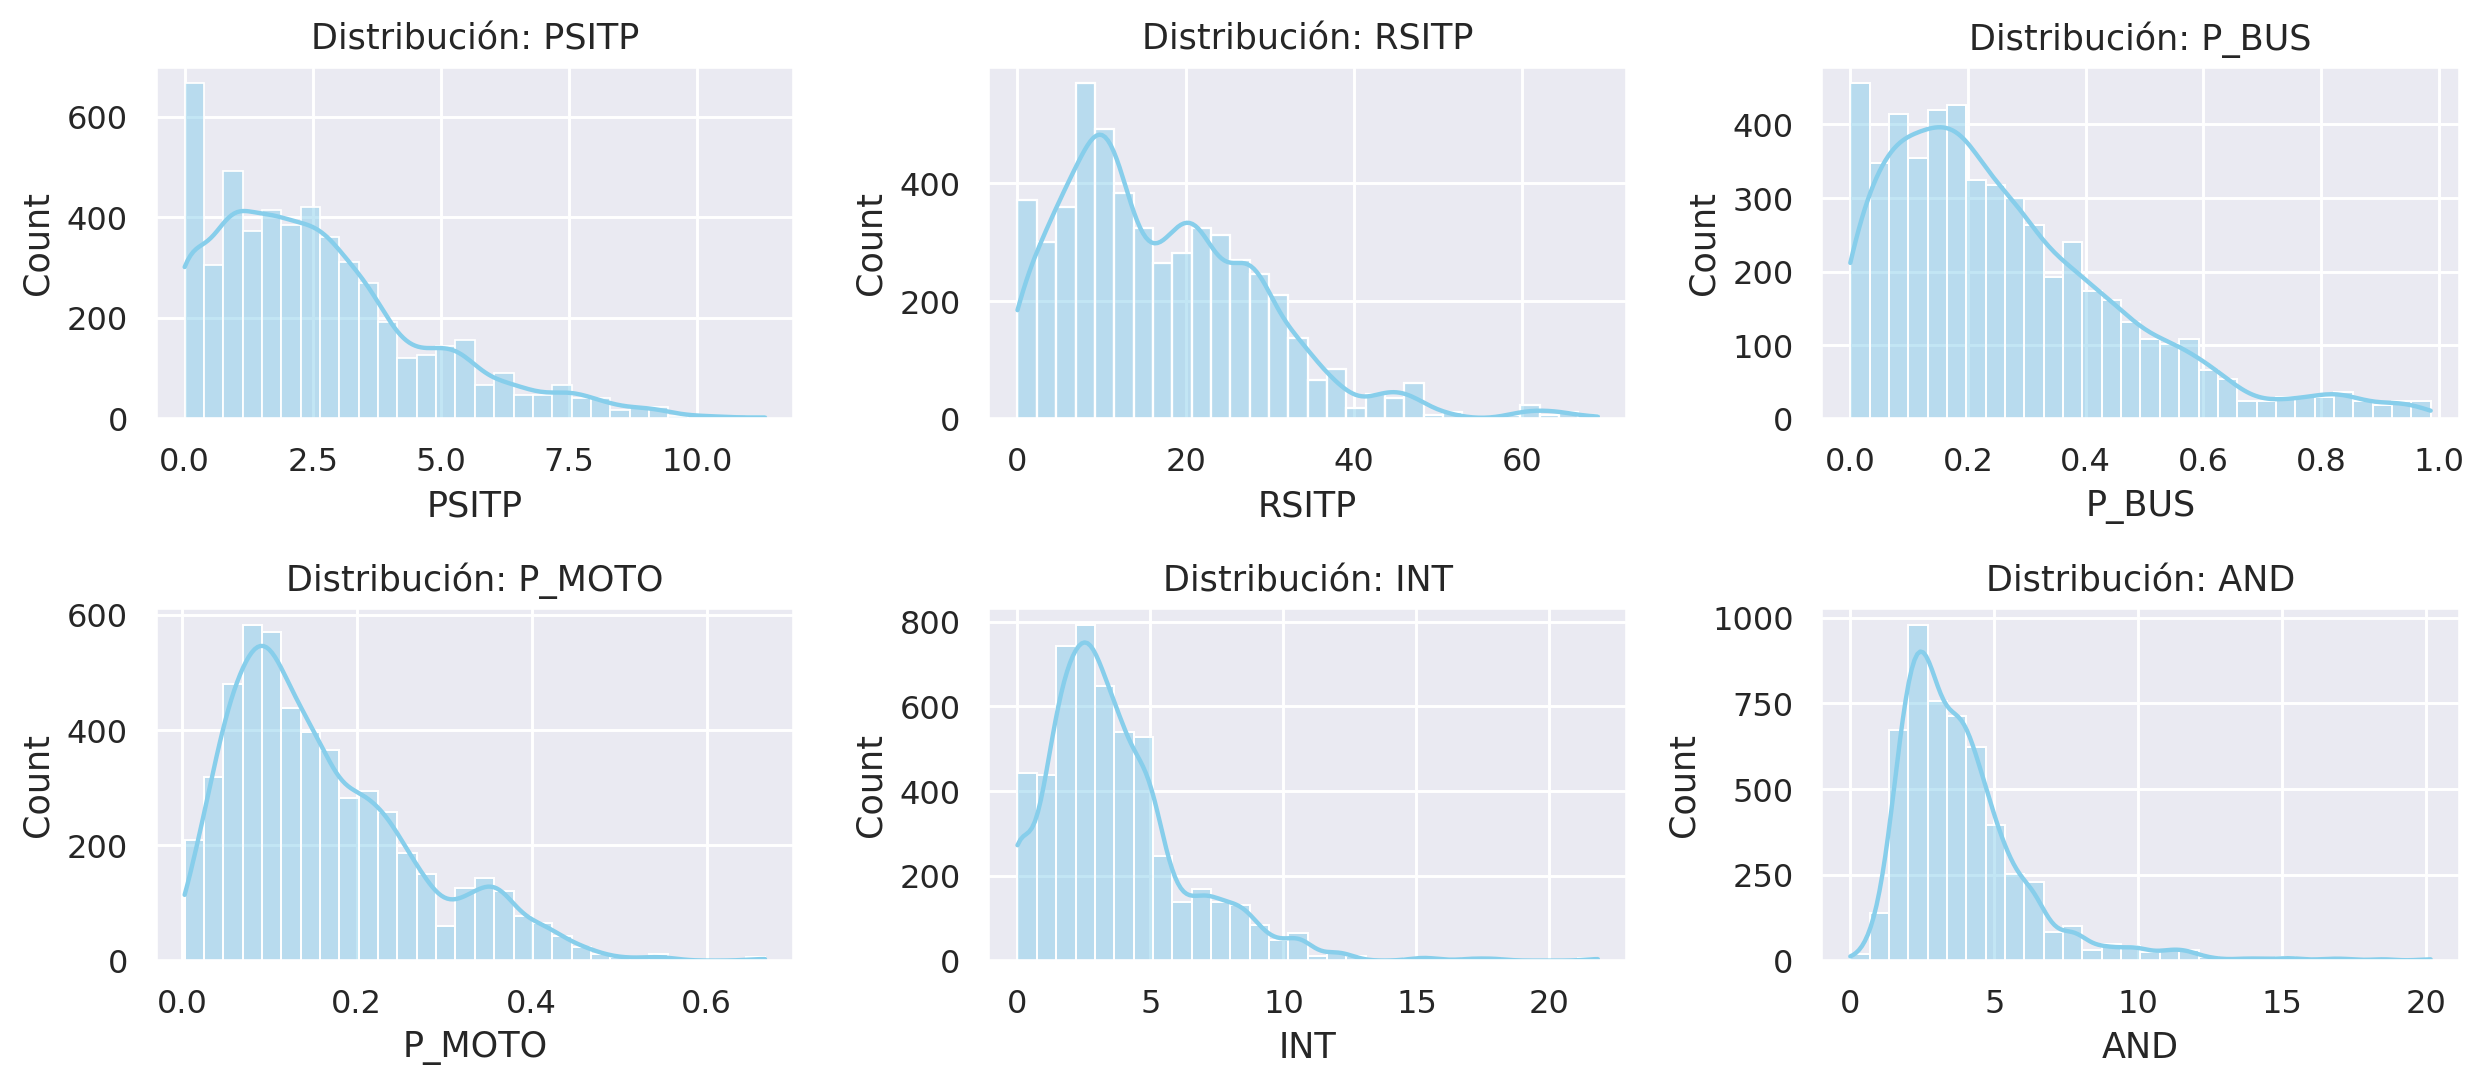

In [ ]:
top_vars = correlaciones.index[1:7]  # Excluye 'SIN' que est√° en la posici√≥n 0

plt.figure(figsize=(12, 10))
for i, var in enumerate(top_vars, 1):
    plt.subplot(4, 3, i)
    if df[var].nunique() < 20:
        sns.countplot(data=df, x=var, palette='Set2')
        plt.xticks(rotation=45)
    else:
        sns.histplot(df[var].dropna(), kde=True, bins=30, color='skyblue')
    plt.title(f'Distribuci√≥n: {var}')
    plt.tight_layout()
plt.show()

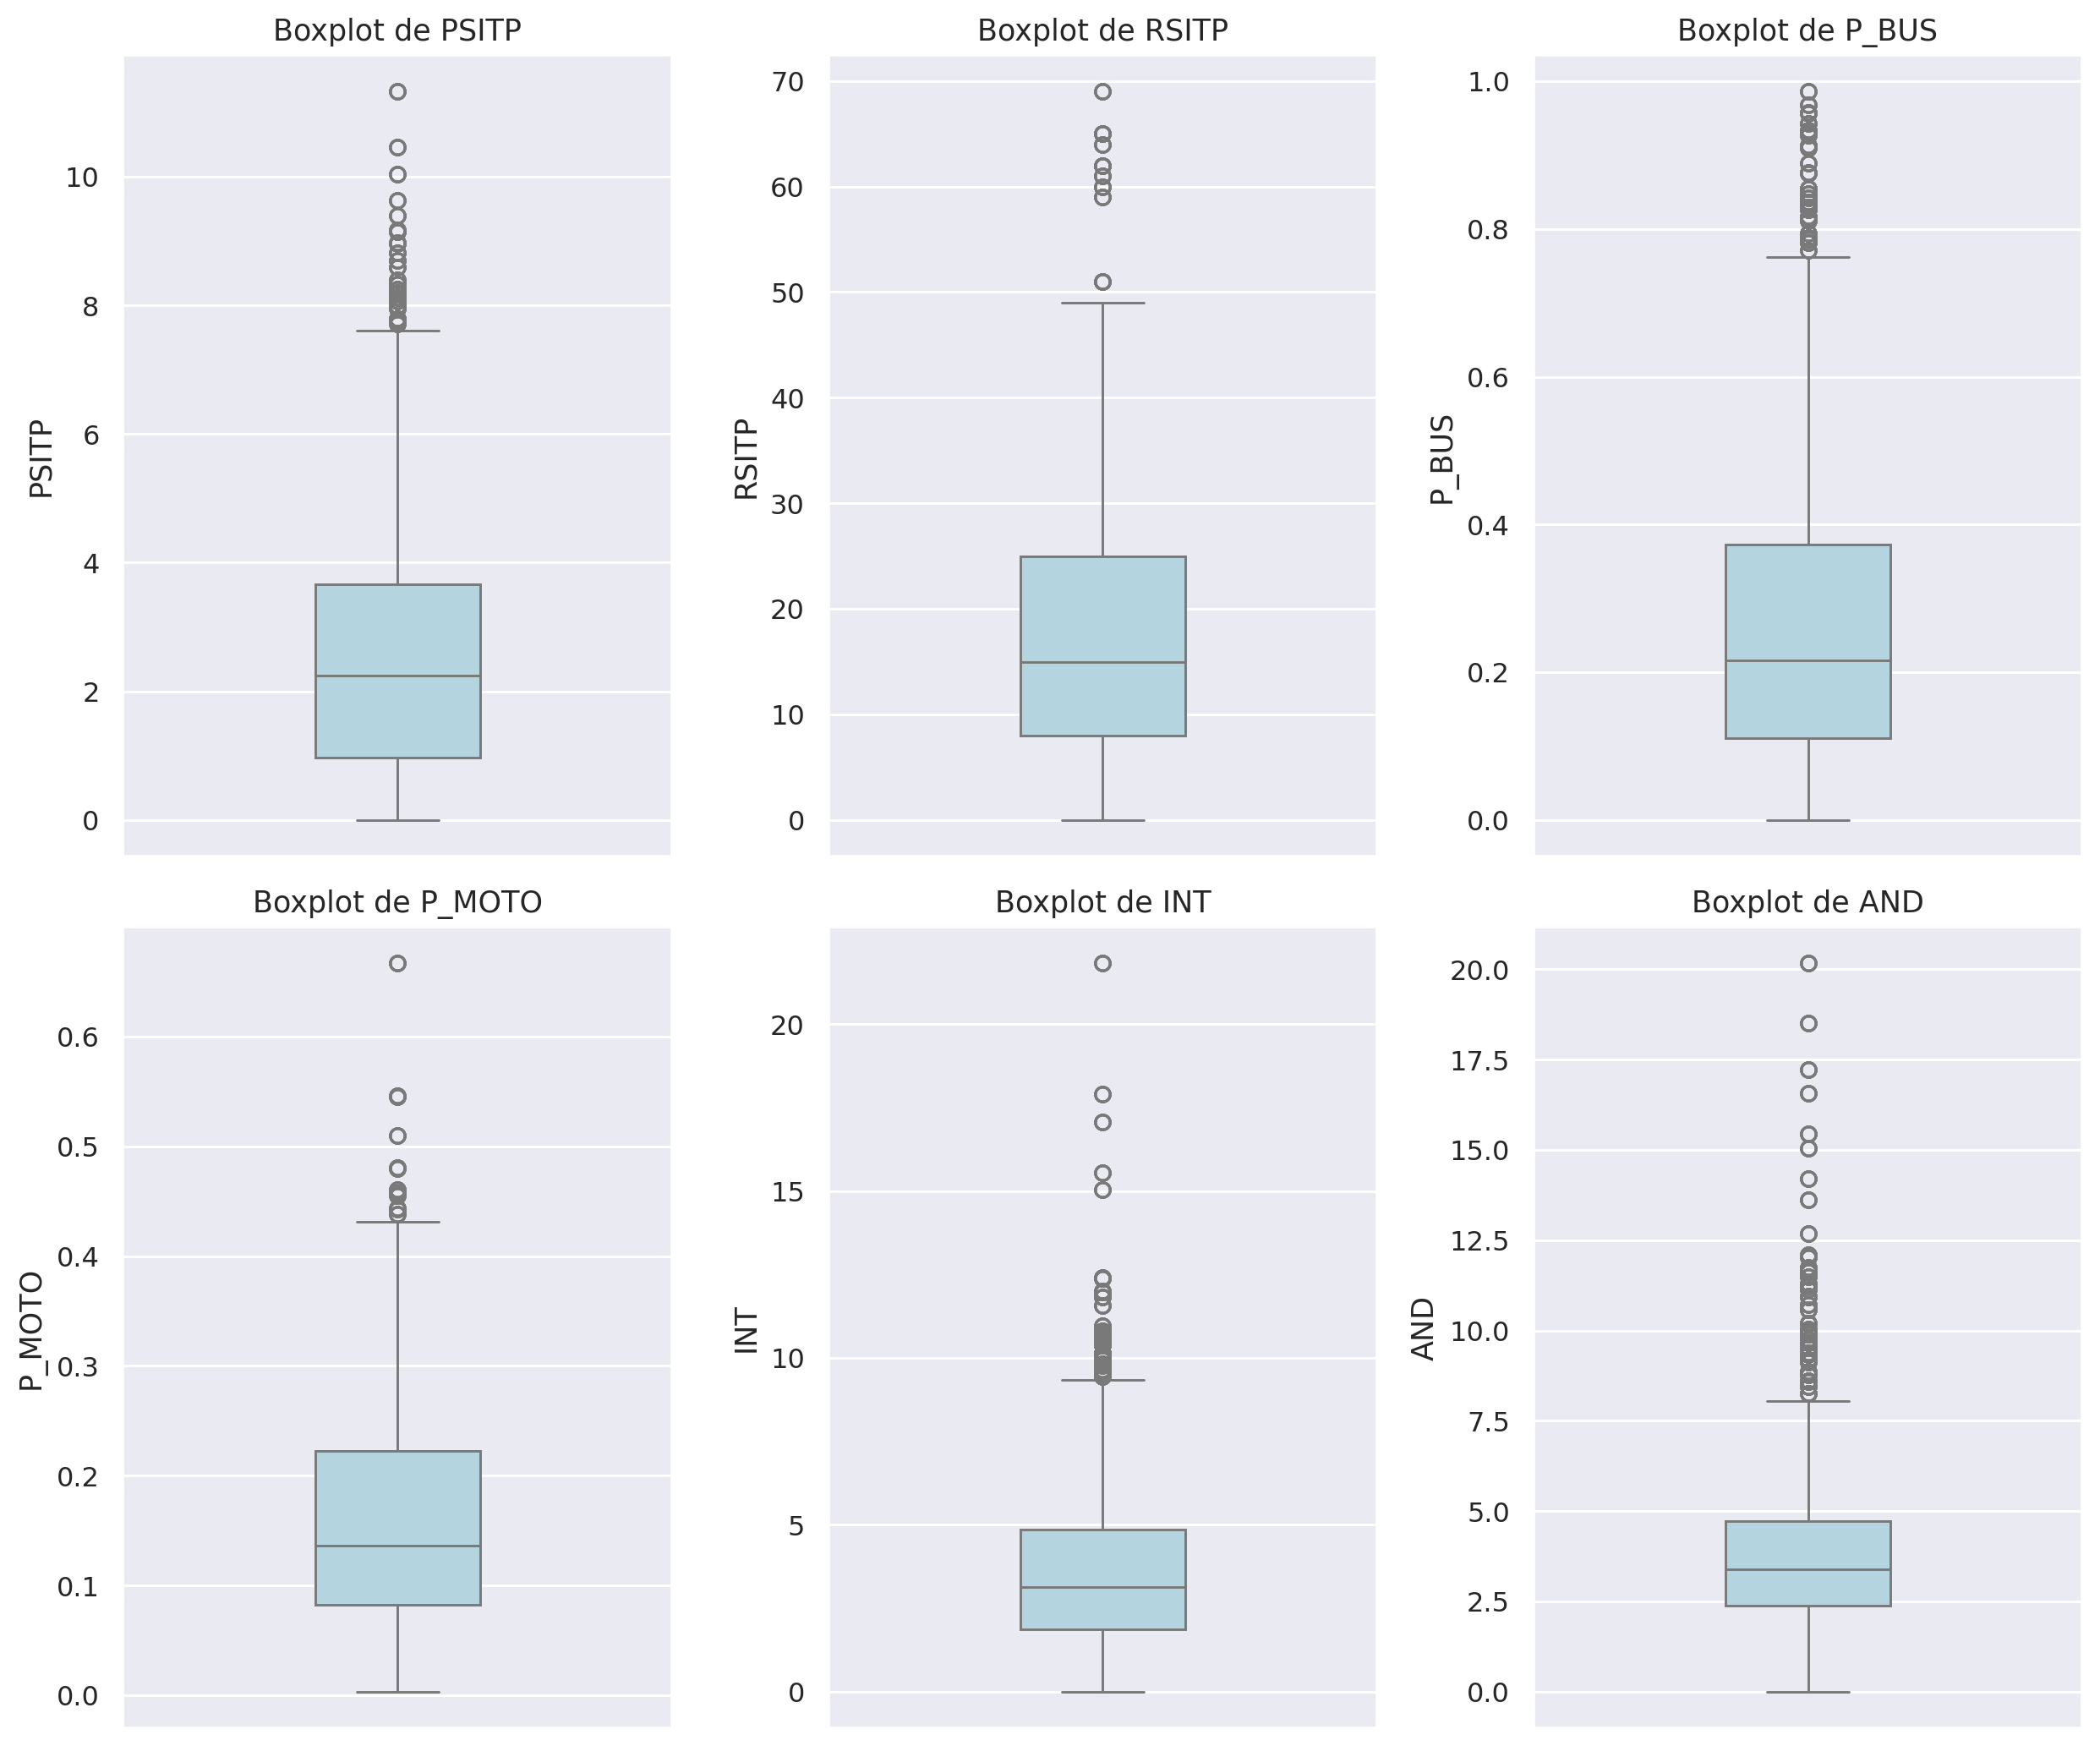

In [ ]:
top_vars = correlaciones.index[1:7]

plt.figure(figsize=(12, 10))
for i, var in enumerate(top_vars, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(data=df, y=var, color='lightblue', width=0.3)
    plt.title(f'Boxplot de {var}')
    plt.xlabel('')
    plt.ylabel(var)

plt.tight_layout()
plt.show()

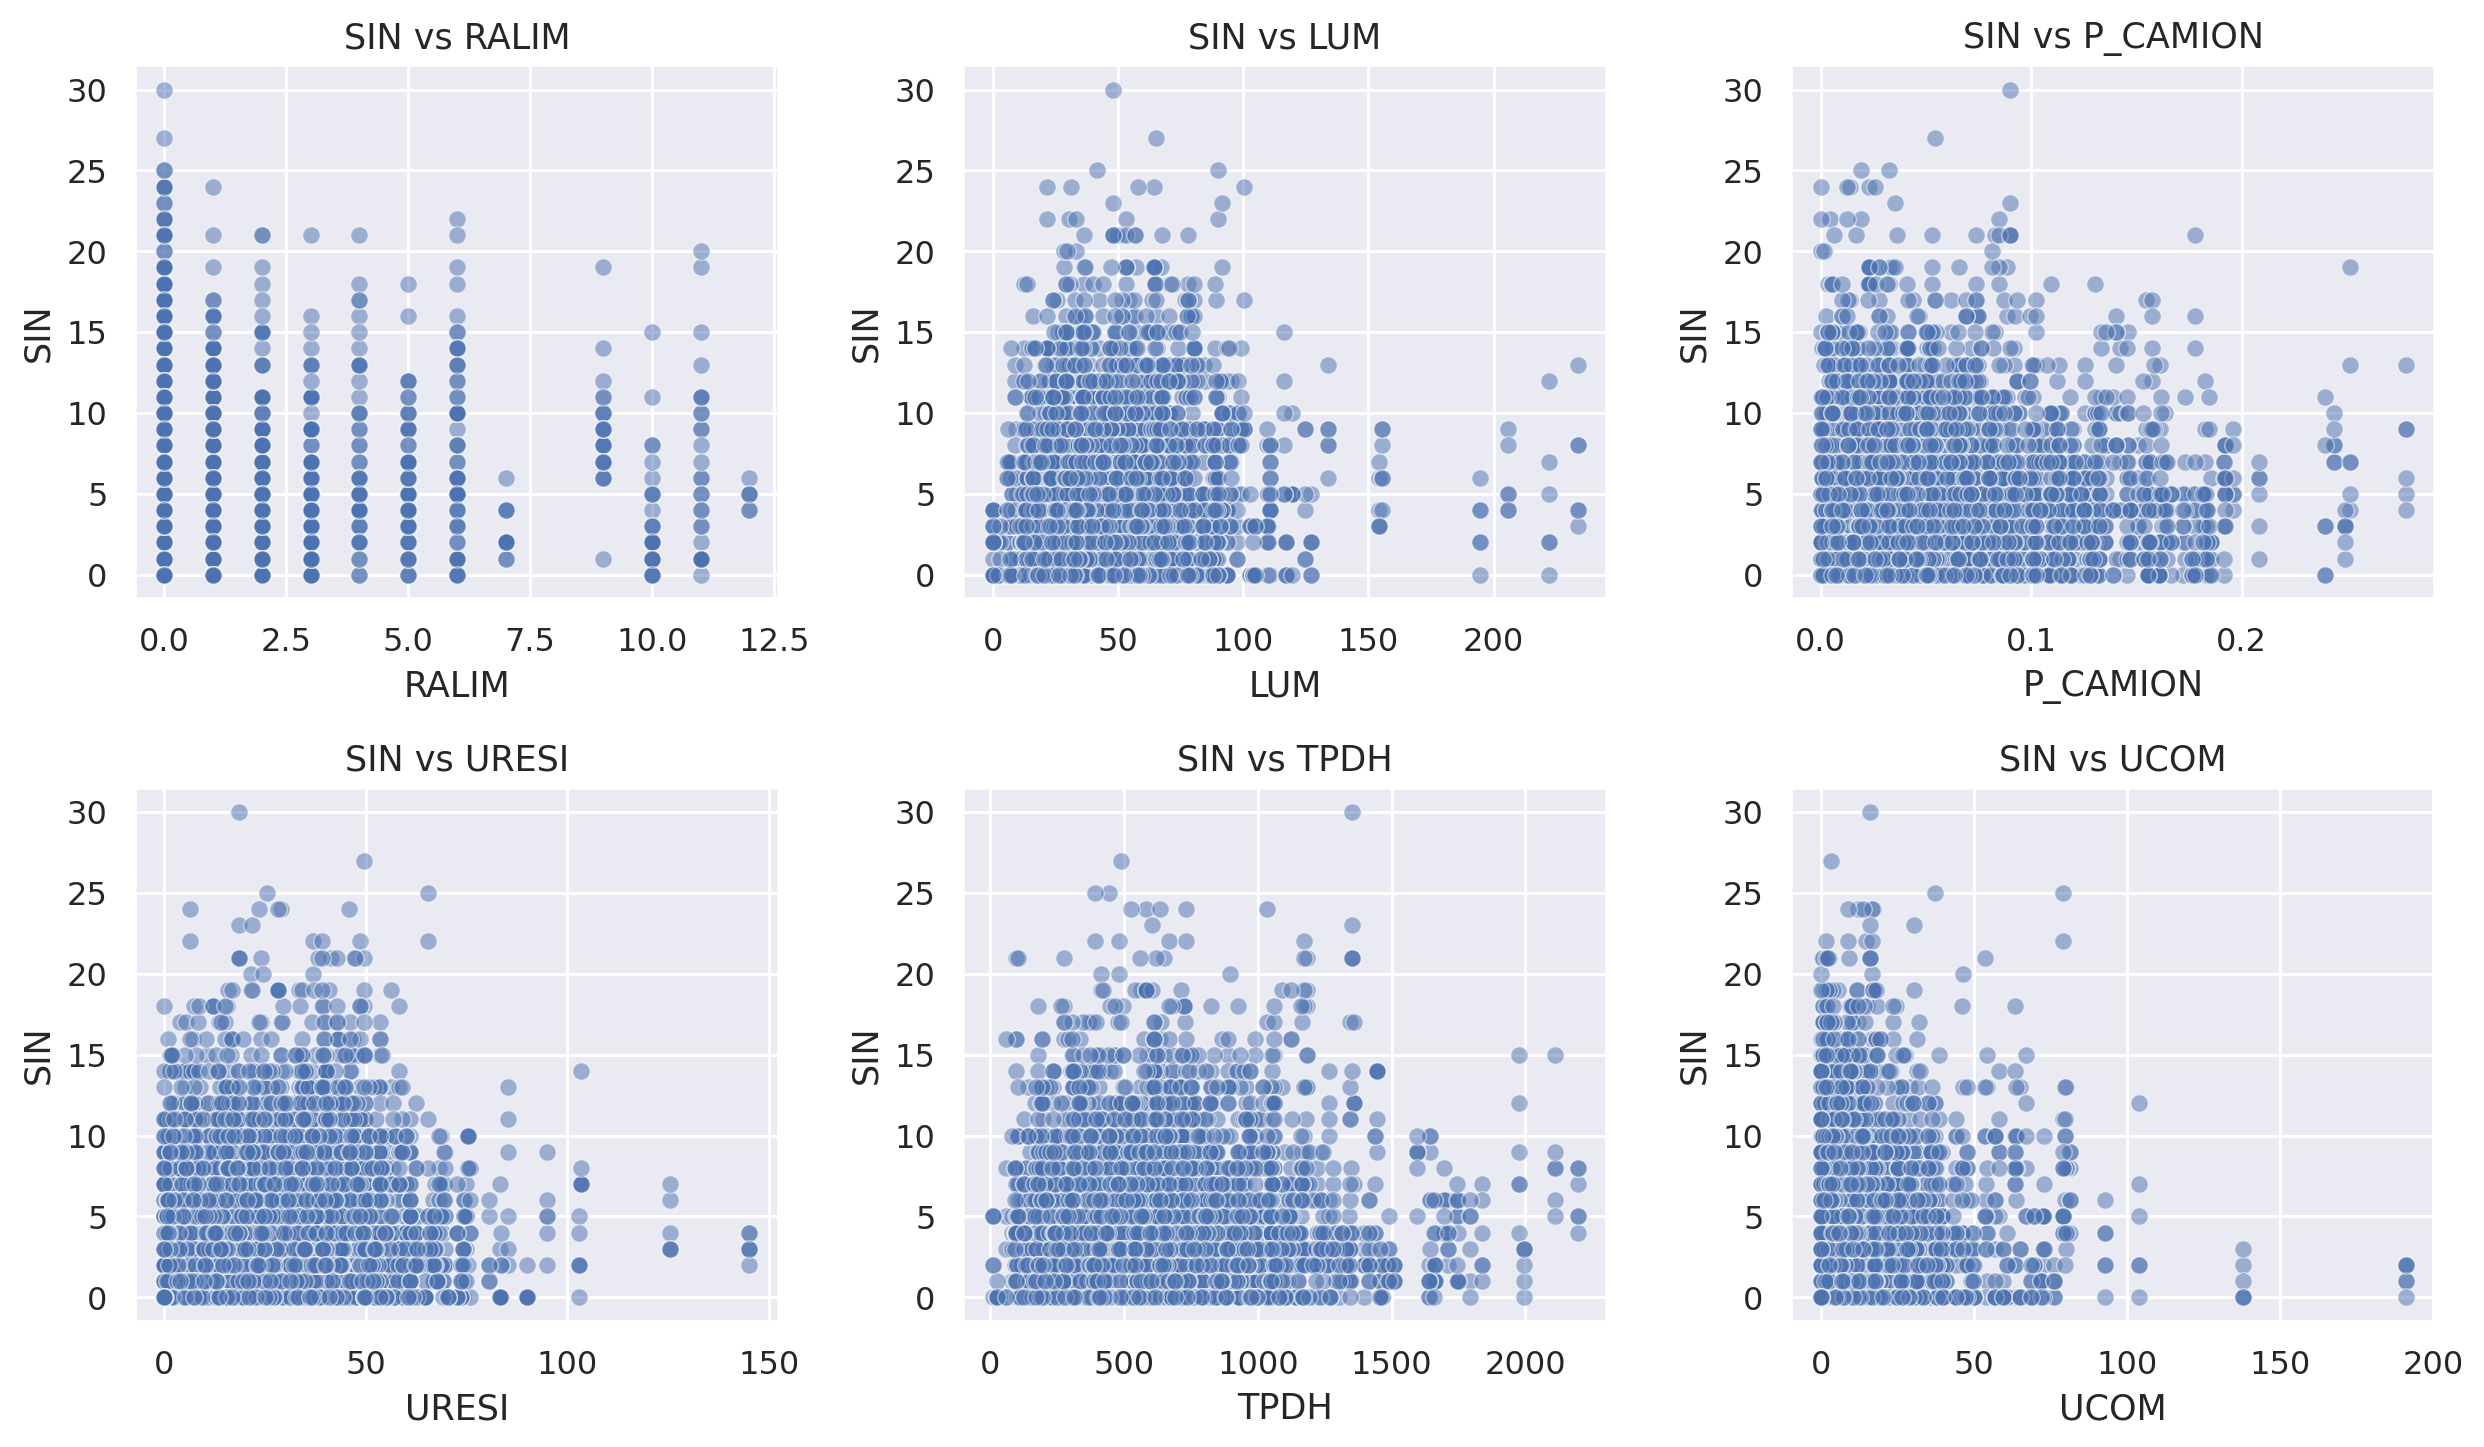

In [ ]:
# --- An√°lisis bivariado: Scatterplots (variables continuas) ---
top_vars = correlaciones.index[8:15]
cont_vars = [var for var in top_vars if df[var].nunique() >= 10]

plt.figure(figsize=(12,10))
for i, var in enumerate(cont_vars, 1):
    plt.subplot(3, 3, i)
    sns.scatterplot(data=df, x=var, y='SIN', alpha=0.5)
    plt.title(f'SIN vs {var}')
    plt.tight_layout()
plt.show()

Vamos a quitar varioables 1que nuestra exploracion inical nos puede indicar porblemas de colinealidad

In [ ]:
df1 = df.drop(['P_AUTO','CURVSD','CARR'], axis = 1)

##**3 PREPROCESAMIENTO Y COMPONENTES PRINCIPALES**

--------

El preprocesamiento de datos es esencial para asegurar la calidad del an√°lisis, ya que permite limpiar, estructurar y escalar adecuadamente la informaci√≥n. Al aplicar t√©cnicas como PCA, se puede reducir la dimensionalidad del conjunto de datos y destacar las variables que m√°s contribuyen a la varianza. Esto es especialmente √∫til para comprender mejor los factores asociados a los siniestros (SIN) y orientar decisiones basadas en evidencia.


### **3.1 Preprocesamiento**

--------------
El preprocesamiento de las variables es una etapa fundamental en cualquier an√°lisis de datos, ya que garantiza que la informaci√≥n est√© limpia, estructurada y sea adecuada para aplicar modelos estad√≠sticos o de machine learning. Este proceso incluye la eliminaci√≥n de variables irrelevantes, el tratamiento de valores faltantes, la transformaci√≥n de variables categ√≥ricas, y la normalizaci√≥n o estandarizaci√≥n de datos, lo cual es especialmente importante en t√©cnicas sensibles a la escala como el An√°lisis de Componentes Principales (PCA) y modelaci√≥n

Previo a la aplicaci√≥n de diferentes t√©cnicas estad√≠sticas es importante realizar el preprocesamiento de las bases de datos, esto con la finalidad de obtener el conjunto de trabajo adecuado, en esta fase se pueden incluir procesos como:

*   Escalado
*   Codificaci√≥n
*   Cambios en la dimensional dad o creaci√≥n de arreglos

In [ ]:
## Set de datos para agrupaci√≥n

X_ag = df1.drop(['TRAMO','CORREDOR','SIN'], axis = 1)  # Se quitan variables que pueden sesgar el an√°lisis como el tipo de siniestros y los n√∫meros y tasas de siniestros.
columna_ag = list(X_ag.columns)
y_ag = df1[['SIN']]
# Dimensiones del conjunto de Calsificacion
print(f'Dimensiones del conjunto de clasificacion: {X_ag.shape}')
print(f'Dimensiones del conjunto de clasificacion: {y_ag.shape}')

Dimensiones del conjunto de clasificacion: (5226, 26)
Dimensiones del conjunto de clasificacion: (5226, 1)


In [ ]:
bol = ['PVEH', 'PPEAT','CICLO','ESTM','RIGID','FLEX','MIX']          # identifican las variables booleanas (estas no requieren escalarse)

numerc = X_ag.select_dtypes(include=np.number).columns      # Se identifican las variables numericas (sin tener en ceunta las variables booleanas), als demas deben ser escaladas.
num = remove_multiple_elements(numerc, bol)

cat = X_ag.select_dtypes(include='object').columns.tolist() ## Se identifican las variables cualitativas estas seran codificadas con onehotencoding


X_bol = X_ag[bol].values
X_num = X_ag[num].values

print (f'Dimensiones variables boleanas: {X_bol.shape}')
print(f'Dimensiones variables numericas: {X_num.shape}')

Dimensiones variables boleanas: (5226, 7)
Dimensiones variables numericas: (5226, 19)


In [ ]:
scaler = MinMaxScaler(feature_range=(0, 1))
X_num_minmax = scaler.fit_transform(X_num)

In [ ]:
# enc = OneHotEncoder(sparse_output=False)     # Declaramos el Transformer "OneHotEncoder".
# X_cat_onehot = enc.fit_transform(X_cat) # Usamos "fit_transform" para obtener la matriz transformada.

In [ ]:
X_ag_fin = np.concatenate((X_num_minmax, X_bol),axis=1)
print(X_ag_fin.shape)

(5226, 26)


### **3.2 An√°lisis de componentes principales (PCA) para agrupaci√≥n.**

------

La aplicaci√≥n de PCA permite reducir la dimensionalidad del conjunto de datos, identificando combinaciones lineales de variables originales que explican la mayor parte de la varianza. En el contexto del an√°lisis de la variable de inter√©s SIN (siniestros), el PCA facilita la identificaci√≥n de aquellas variables que m√°s contribuyen a la variabilidad general del sistema, lo que resulta clave para entender los factores subyacentes que podr√≠an estar relacionados con la ocurrencia de siniestros y para orientar de manera m√°s eficiente los an√°lisis posteriores o la toma de decisiones.

In [ ]:

principal=PCA(n_components=26)
principal.fit(X_ag_fin)
x=principal.transform(X_ag_fin)

# Check the dimensions of data after PCA
print(x.shape)

(5226, 26)


In [ ]:
varianza_expl = principal.explained_variance_ratio_
print(varianza_expl)

[3.11566991e-01 1.72107759e-01 1.21678194e-01 9.94243179e-02
 5.11774860e-02 3.27466616e-02 3.14209846e-02 2.81394601e-02
 2.28061315e-02 1.71846338e-02 1.52834121e-02 1.31064035e-02
 1.23883556e-02 1.16051436e-02 1.09980808e-02 1.01534778e-02
 9.28237415e-03 8.20779945e-03 6.49182296e-03 5.66077646e-03
 4.90253933e-03 3.66719558e-03 1.81534390e-18 1.67085607e-35
 0.00000000e+00 0.00000000e+00]


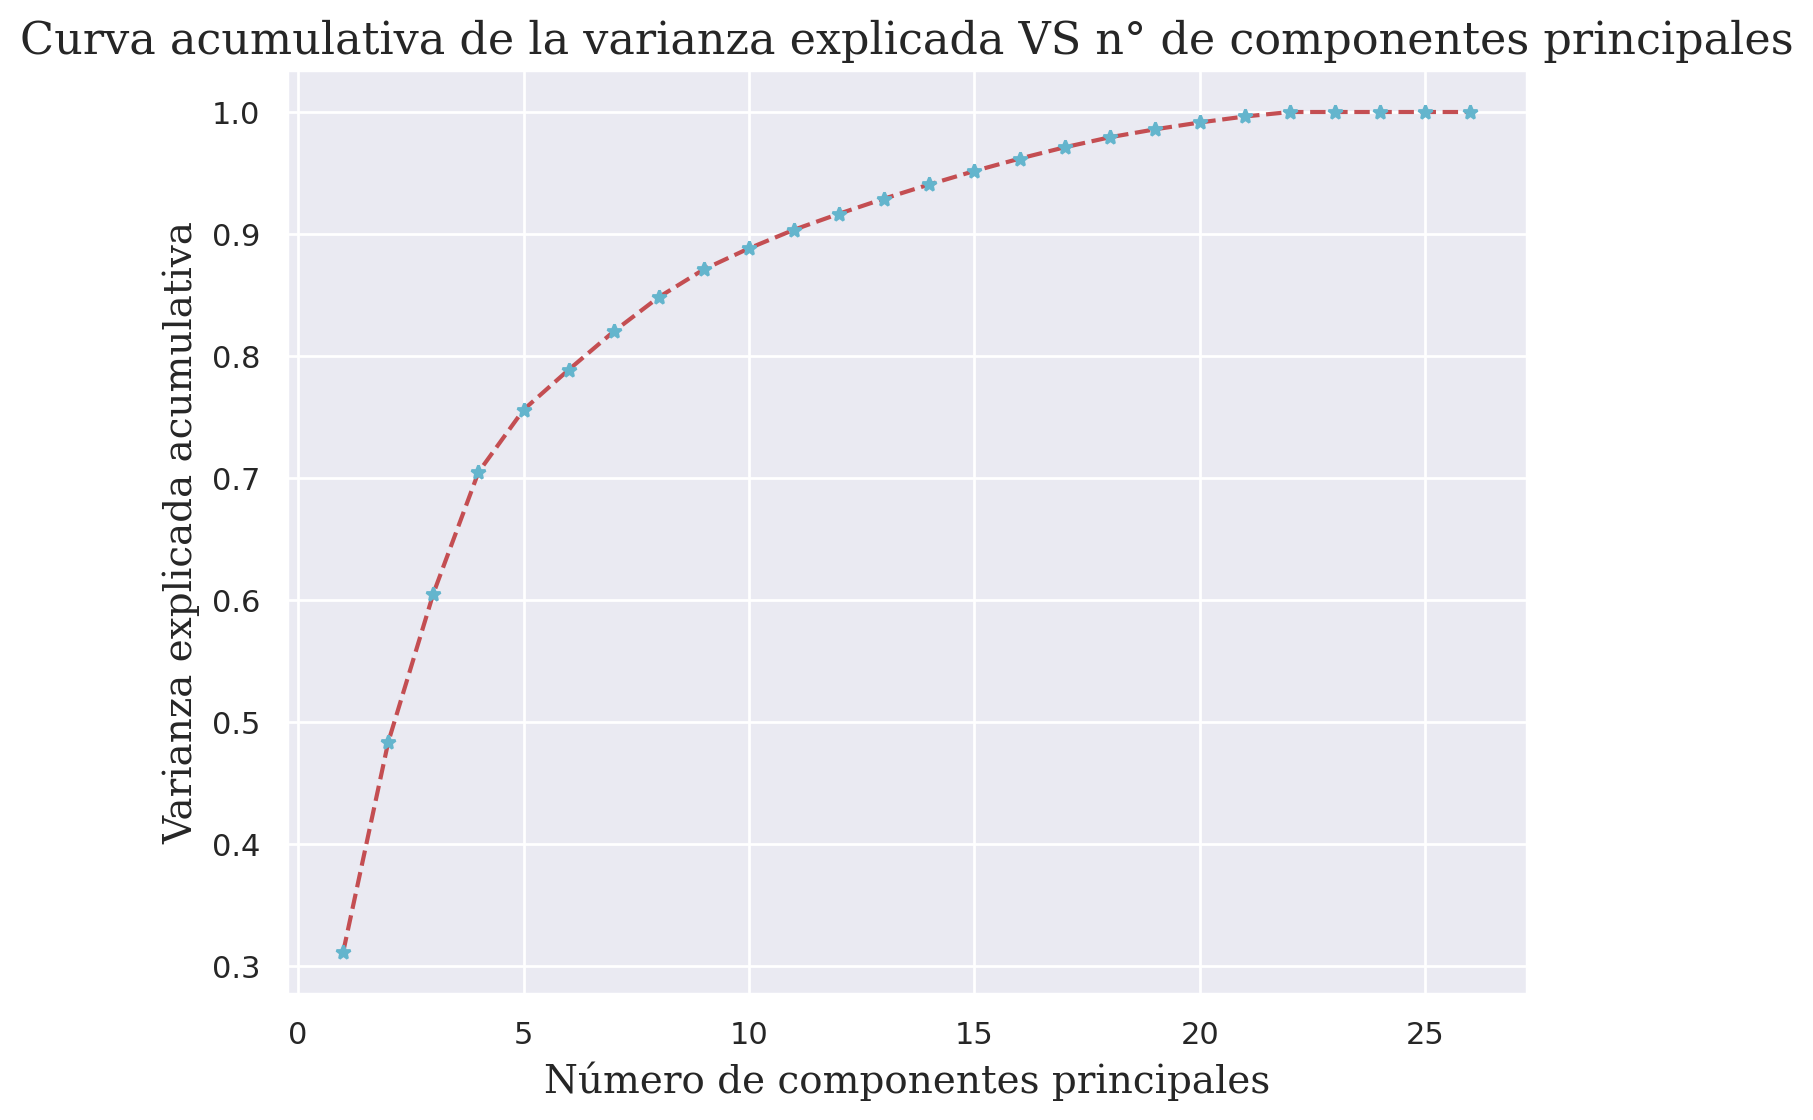

In [ ]:
cumulative_explained_variance_plot(varianza_expl)

In [ ]:

# Crear DataFrame con la varianza explicada
df_varianza = pd.DataFrame({
    'Componente': [f'PC{i+1}' for i in range(len(varianza_expl))],
    'Varianza Explicada (%)': varianza_expl * 100
})
# Mostrar ordenado
df_varianza = df_varianza.sort_values(by='Varianza Explicada (%)', ascending=False).reset_index(drop=True)

In [ ]:
# Obtener los nombres de las variables originales si est√°n disponibles
nombres_variables =columna_ag

# Matriz de cargas
loadings = pd.DataFrame(principal.components_.T,
                        columns=[f'PC{i+1}' for i in range(principal.n_components_)],
                        index=nombres_variables)

# Ver las variables que m√°s aportan a cada componente
# Ejemplo: top 5 variables para PC1
top_pc1 = loadings['PC1'].abs().sort_values(ascending=False).head(15)
print("Top 5 variables que m√°s aportan a PC1:")
print(top_pc1)

Top 5 variables que m√°s aportan a PC1:
RTRON       0.600408
RSITP       0.499549
RALIM       0.449398
ESTM        0.217760
FLEX        0.196781
PPEAT       0.148189
VEL         0.144796
PVEH        0.138895
CICLO       0.093703
VELSD       0.091639
P_BUS       0.086722
MIX         0.057182
P_CAMION    0.050451
RIGID       0.045034
P_MOTO      0.041306
Name: PC1, dtype: float64


##**4 MODELACION DE DATOS**

--------

La modelaci√≥n y la implementaci√≥n de funciones de desempe√±o en seguridad vial son fundamentales para comprender los factores que influyen en la siniestralidad. Estas herramientas permiten predecir riesgos, identificar puntos cr√≠ticos y orientar intervenciones m√°s efectivas para reducir accidentes y salvar vidas..

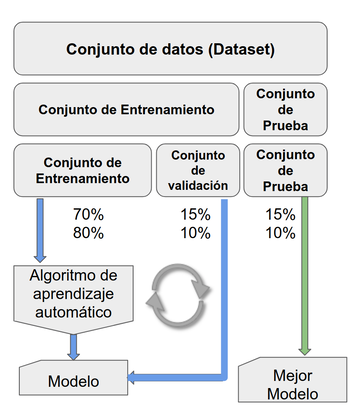


In [ ]:
y = y_ag.iloc[:, 0]  # extrae la √∫nica columna como vecto
X = pd.DataFrame(X_ag_fin, columns=[f'var_{i}' for i in range(X_ag_fin.shape[1])])
X.columns = columna_ag

### **4.1 Conjuntos de entrenamiento y pruebas**

---
Generar conjuntos de entrenamiento y prueba, junto con la aplicaci√≥n de validaci√≥n cruzada, es crucial para garantizar que un modelo de an√°lisis o predicci√≥n sea robusto y generalizable. El conjunto de entrenamiento permite ajustar los par√°metros del modelo, mientras que el de prueba eval√∫a su rendimiento en datos no vistos. La validaci√≥n cruzada, por su parte, ayuda a reducir la varianza de las estimaciones, evita el sobreajuste y permite una selecci√≥n m√°s confiable de variables y modelos √≥ptimos. Esto es especialmente importante en contextos como la seguridad vial, donde se requiere alta precisi√≥n para la toma de decisiones.

In [ ]:
# 1. Divisi√≥n 70/30
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42, shuffle=True)


### **4.1 Validacion Cruzada**

---
La validaci√≥n cruzada es una t√©cnica fundamental en el desarrollo de modelos estad√≠sticos y de machine learning, que permite evaluar su desempe√±o de manera robusta y evitar problemas como el sobreajuste. Consiste en dividir el conjunto de datos en varios bloques o folds. En cada iteraci√≥n, uno de estos bloques se utiliza como conjunto de prueba, mientras los restantes se emplean para entrenar el modelo. Este proceso se repite tantas veces como bloques se hayan definido (En este caso 5 en una validaci√≥n cruzada de 5-fold), y al final se promedian los resultados obtenidos. Esto proporciona una estimaci√≥n m√°s realista del rendimiento del modelo al generalizar a datos nuevos.

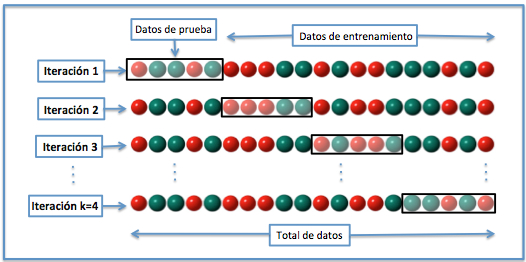

In [ ]:
# 4. Aplicar KFold sobre conjunto de entrenamiento
kf = KFold(n_splits=5, shuffle=True, random_state=42)

mejores_resultados = []

In [ ]:
kf = KFold(n_splits=5, shuffle=True, random_state=42)

mejores_resultados = []
print("üîÅ Validaci√≥n cruzada 5-fold con stepwise...")

for fold, (train_idx, val_idx) in enumerate(kf.split(X_train)):
    X_tr, X_val = X_train.iloc[train_idx], X_train.iloc[val_idx]
    y_tr, y_val = y_train.iloc[train_idx], y_train.iloc[val_idx]

    selected_vars = stepwise_selection(X_tr, y_tr, verbose=False)
    model = fit_model(X_tr[selected_vars], y_tr)

    # Evaluaci√≥n en validaci√≥n
    X_val_model = sm.add_constant(X_val[selected_vars], has_constant='add')
    y_pred_val = model.predict(X_val_model)

    pseudo_r2 = 1 - model.llf / model.null_deviance
    mejores_resultados.append({
        'fold': fold+1,
        'variables': selected_vars,
        'modelo': model,
        'aic': model.aic,
        'bic': model.bic,
        'pseudo_r2': pseudo_r2
    })
    print(f"Fold {fold+1}: AIC={model.aic:.2f}, Pseudo-R¬≤={pseudo_r2:.4f}, Variables={len(selected_vars)}")

üîÅ Validaci√≥n cruzada 5-fold con stepwise...
Fold 1: AIC=14655.67, Pseudo-R¬≤=3.8500, Variables=13
Fold 2: AIC=14668.16, Pseudo-R¬≤=3.8542, Variables=13
Fold 3: AIC=14621.12, Pseudo-R¬≤=3.8909, Variables=12
Fold 4: AIC=14648.79, Pseudo-R¬≤=3.9146, Variables=11
Fold 5: AIC=14697.43, Pseudo-R¬≤=3.9051, Variables=10


In [ ]:
mejor_modelo_info = min(mejores_resultados, key=lambda x: x['aic'])
modelo_final = mejor_modelo_info['modelo']
vars_finales = mejor_modelo_info['variables']

print(f"\n‚úÖ Mejor modelo: fold {mejor_modelo_info['fold']} con AIC={mejor_modelo_info['aic']:.2f}")


‚úÖ Mejor modelo: fold 3 con AIC=14621.12


### **4.3 Aplicacion de Modelo Binomial Negativo**

---
El modelo binomial negativo es especialmente importante en la estimaci√≥n de funciones de desempe√±o en seguridad vial porque permite manejar adecuadamente uno de los problemas m√°s comunes en este tipo de datos: la sobredispersi√≥n.

En contextos como el an√°lisis de siniestralidad, la variable de inter√©s (por ejemplo, el n√∫mero de siniestros en un tramo vial) suele ser una variable de conteo. Aunque modelos como la regresi√≥n de Poisson son una primera aproximaci√≥n natural para este tipo de variables, suponen que la media y la varianza son iguales, lo cual rara vez ocurre en la pr√°ctica.

En cambio, el modelo binomial negativo relaja esta restricci√≥n al incorporar un par√°metro adicional que permite que la varianza sea mayor que la media. Esto lo hace m√°s flexible y adecuado para modelar la variabilidad real observada en los datos de siniestralidad, mejorando la calidad de las predicciones y evitando errores sistem√°ticos.

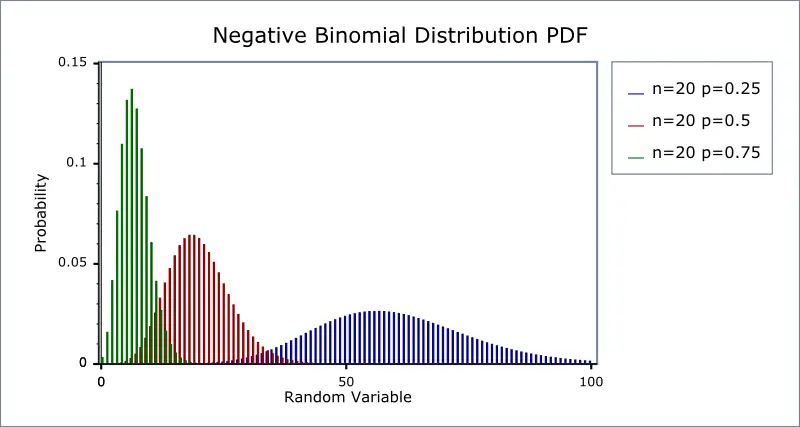

In [ ]:
# Evaluacion en Test
X_test_model = sm.add_constant(X_test[vars_finales], has_constant='add')
y_pred_test = modelo_final.predict(X_test_model)

In [ ]:
# M√©tricas en test
pseudo_r2_test = 1 - modelo_final.llf / modelo_final.null_deviance
aic_test = modelo_final.aic
bic_test = modelo_final.bic

In [ ]:
# resultados
tabla_resultado = pd.DataFrame({
    'Variable': modelo_final.params.index,
    'Coeficiente': modelo_final.params.values,
    'Error est√°ndar': modelo_final.bse.values,
    'P-valor': modelo_final.pvalues.values
})

In [ ]:
# salidas
print("\nüìã Tabla de coeficientes del mejor modelo (evaluado sobre TEST):\n")
print(tabla_resultado.to_string(index=False))

print("\nüìà M√©tricas del modelo evaluado en conjunto TEST:")
print(f"AIC: {aic_test:.2f}")
print(f"BIC: {bic_test:.2f}")
print(f"Pseudo-R¬≤ (McFadden): {pseudo_r2_test:.4f}")


üìã Tabla de coeficientes del mejor modelo (evaluado sobre TEST):

Variable  Coeficiente  Error est√°ndar      P-valor
   const    -0.100024        0.050429 4.731497e-02
   P_BUS     1.323998        0.124523 2.102743e-26
     LUM    -0.100024        0.050429 4.731497e-02
  P_MOTO     1.442697        0.141666 2.342638e-24
    PVEH     0.436783        0.153215 4.361199e-03
P_CAMION     0.667056        0.144720 4.040336e-06
   RIGID     0.862083        0.173505 6.742286e-07
    CURV    -0.616469        0.194367 1.515636e-03
  INTSEM     0.696648        0.138805 5.197138e-07
   PPEAT     0.671244        0.156274 1.744604e-05
     MIX     0.597190        0.193672 2.045722e-03
    FLEX     0.488648        0.131337 1.987879e-04
    TPDH     0.400932        0.145813 5.966319e-03

üìà M√©tricas del modelo evaluado en conjunto TEST:
AIC: 14621.12
BIC: -21188.24
Pseudo-R¬≤ (McFadden): 3.8909


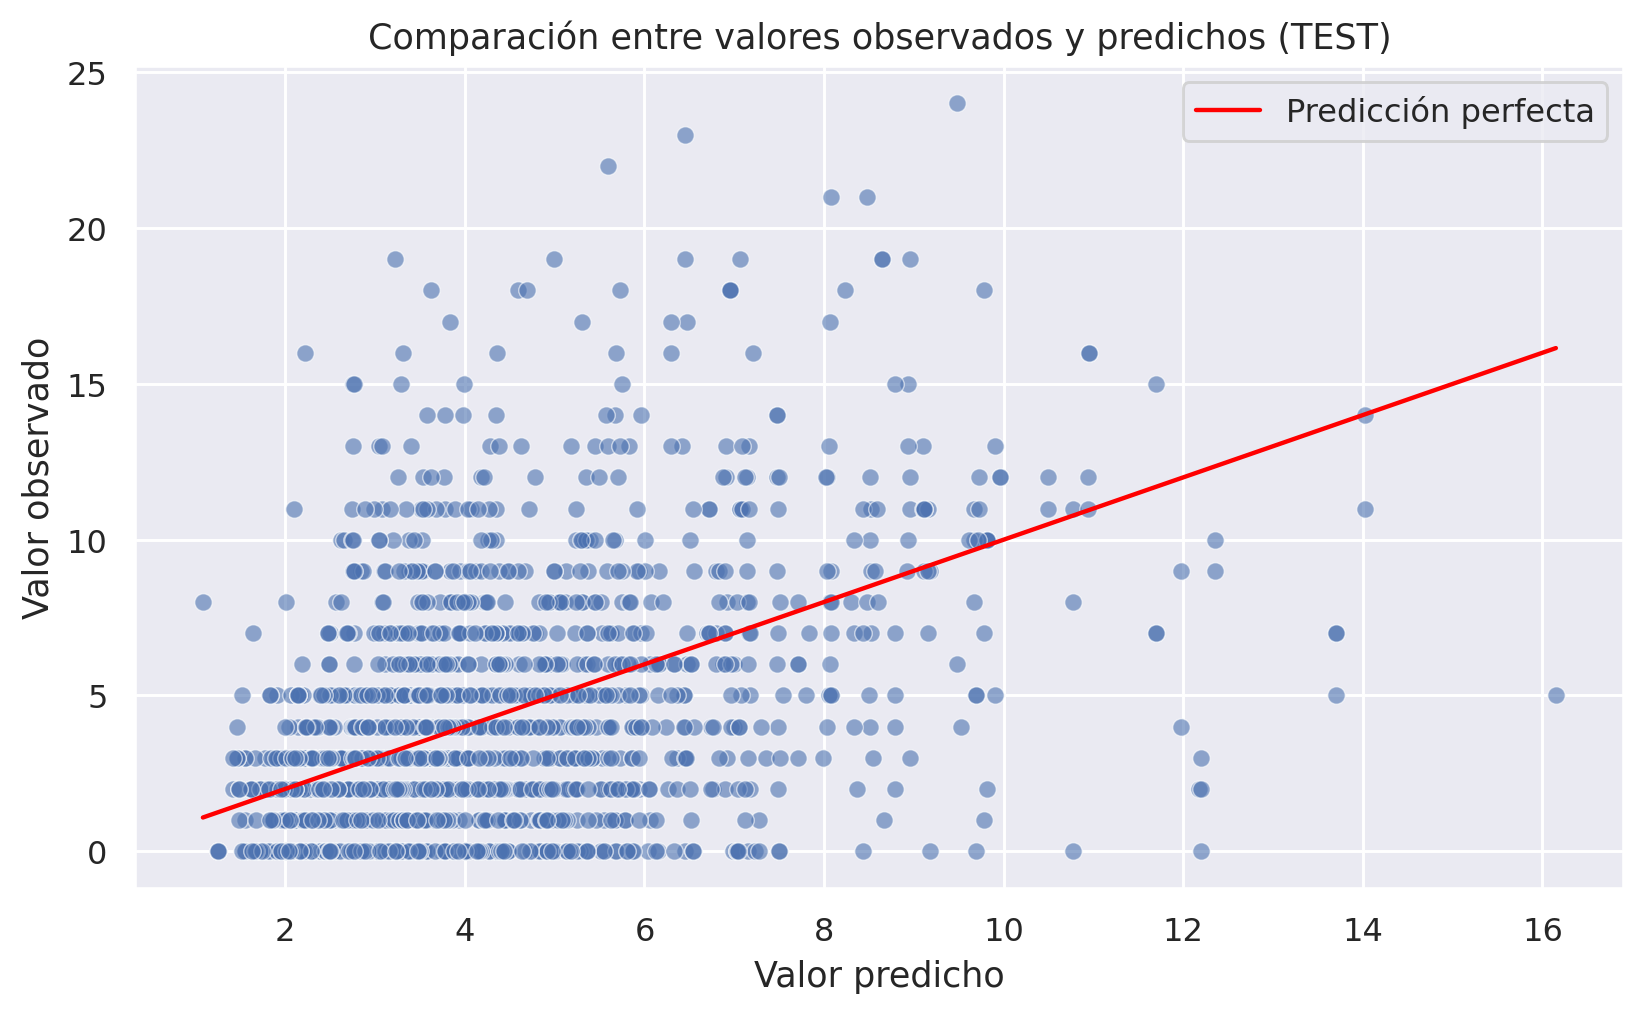

In [ ]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x=y_pred_test, y=y_test, alpha=0.6)
sns.lineplot(x=y_pred_test, y=y_pred_test, color='red', label='Predicci√≥n perfecta')
plt.xlabel("Valor predicho")
plt.ylabel("Valor observado")
plt.title("Comparaci√≥n entre valores observados y predichos (TEST)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

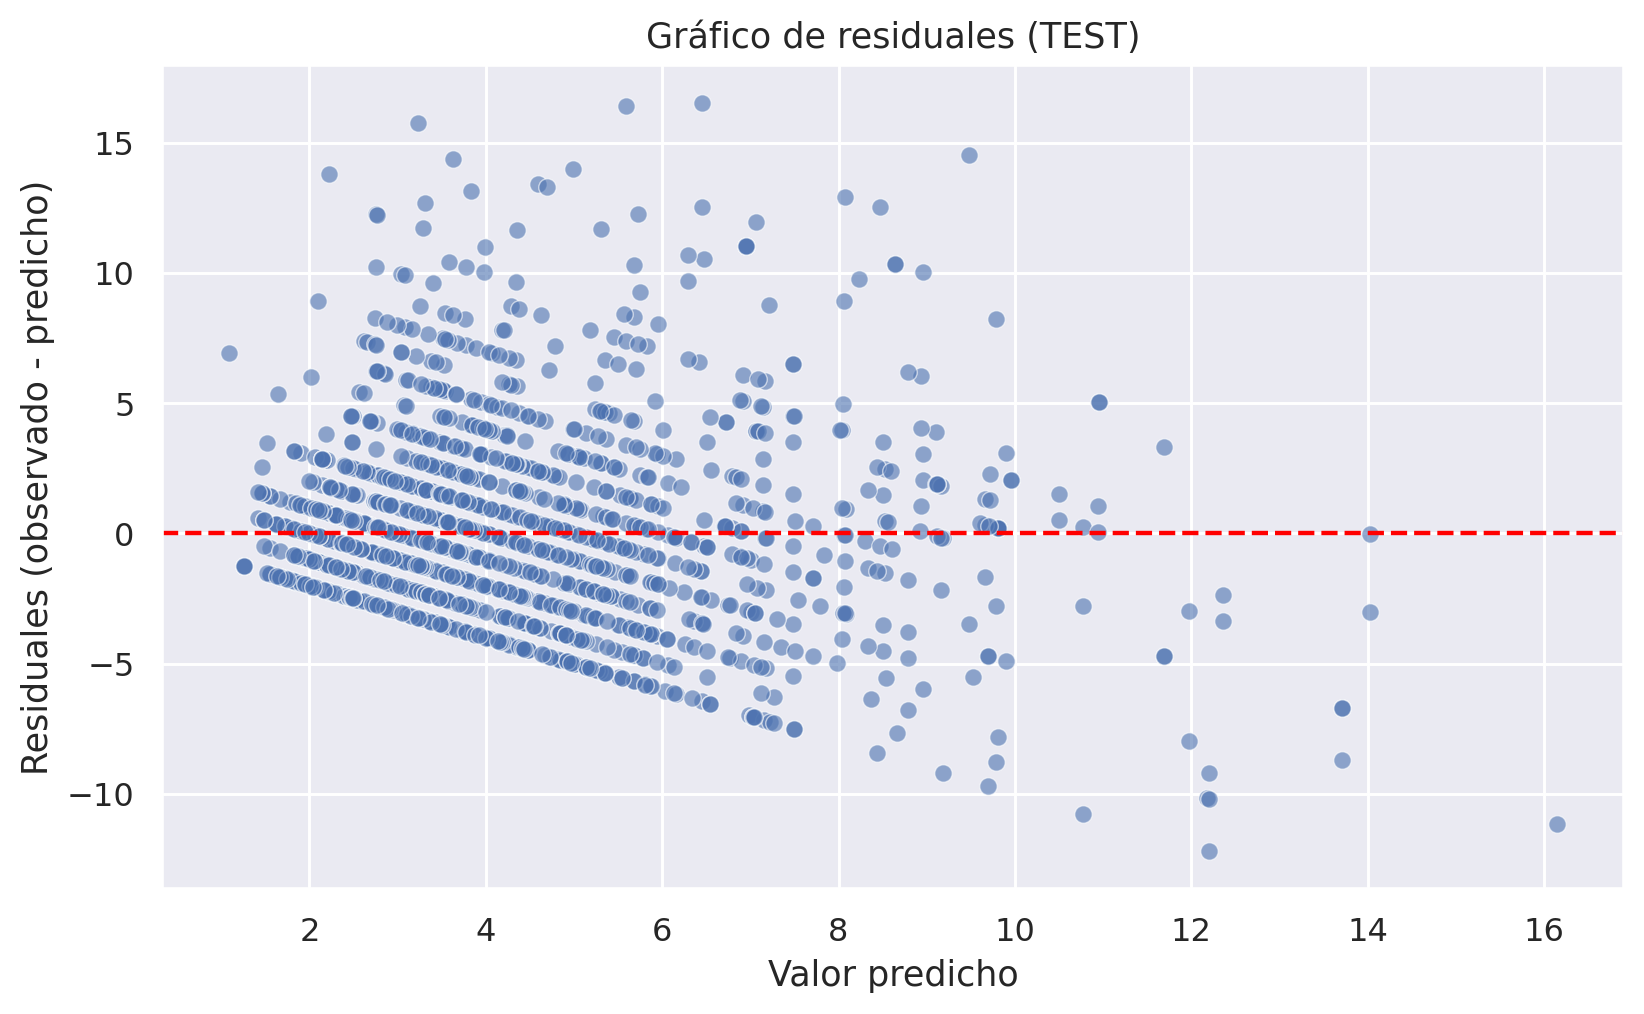

In [ ]:
residuals = y_test - y_pred_test

plt.figure(figsize=(8, 5))
sns.scatterplot(x=y_pred_test, y=residuals, alpha=0.6)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Valor predicho")
plt.ylabel("Residuales (observado - predicho)")
plt.title("Gr√°fico de residuales (TEST)")
plt.grid(True)
plt.tight_layout()
plt.show()

## **5. CONCLUSIONES**

--------------


*   El preprocesamiento de los datos es una etapa esencial en cualquier an√°lisis de siniestralidad, ya que permite limpiar, transformar y normalizar las variables, garantizando que los modelos posteriores se basen en informaci√≥n confiable y comparable. Este proceso tambi√©n facilita la detecci√≥n de errores, valores at√≠picos y patrones relevantes en los datos.

*   La aplicaci√≥n del An√°lisis de Componentes Principales (PCA) permite reducir la dimensionalidad del conjunto de datos, identificando las variables que explican la mayor parte de la varianza. Esto es clave para enfocar el an√°lisis en los factores m√°s influyentes sobre los siniestros, simplificando el modelo sin perder informaci√≥n cr√≠tica.

*   Dividir los datos en conjuntos de entrenamiento y prueba, junto con el uso de validaci√≥n cruzada, mejora la calidad de la modelaci√≥n al reducir el riesgo de sobreajuste. Esta estrategia asegura que los modelos aprendan patrones generalizables y se desempe√±en de manera robusta ante nuevos datos, lo que aumenta su utilidad pr√°ctica.

*   Los modelos estad√≠sticos aplicados, como la regresi√≥n binomial negativa, permiten analizar y predecir la ocurrencia de siniestros considerando la distribuci√≥n discreta y sobredispersi√≥n t√≠pica de este tipo de datos. Esto facilita la construcci√≥n de funciones de desempe√±o de seguridad vial m√°s precisas, que son fundamentales para la toma de decisiones y la gesti√≥n del riesgo en contextos urbanos.







